Mounting drive

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle



Paths to image loading

In [3]:

images_path = "/content/drive/MyDrive/CS6353/Project/Datasets/shcxr-lung-mask/images"  # Replace with the path to X-ray images
masks_path = "/content/drive/MyDrive/CS6353/Project/Datasets/shcxr-lung-mask/mask"    # Replace with the path to lung masks


preporcess the data

In [4]:
from tqdm import tqdm  # Import tqdm for progress visualization

# Preprocess Images and Masks
def preprocess_images_and_masks(images_path, masks_path):
    images, labels = [], []

    # Create a dictionary of masks for quick lookup
    masks_dict = {os.path.splitext(mask_file)[0]: os.path.join(masks_path, mask_file)
                  for mask_file in os.listdir(masks_path)}

    # Use tqdm to show progress
    for img_file in tqdm(os.listdir(images_path), desc="Processing Images"):
        img_name = os.path.splitext(img_file)[0]  # Remove extension
        mask_name = img_name + "_mask"  # Match the mask name

        img_path = os.path.join(images_path, img_file)
        mask_path = masks_dict.get(mask_name, None)

        # Load image and mask
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) if mask_path else None

        # Check if files are loaded correctly
        if img is None or mask is None:
            print(f"Error: Missing files for {img_name}. Skipping.")
            continue

        # Resize and normalize
        img = cv2.resize(img, (224, 224)) / 255.0
        mask = cv2.resize(mask, (224, 224)) / 255.0

        # Apply mask to image
        segmented_img = img * mask

        images.append(segmented_img)
        labels.append(1 if "_1" in img_name else 0)  # Extract label from filename

    # Shuffle the dataset
    images, labels = shuffle(np.array(images), np.array(labels), random_state=42)
    return images, labels


loading data

Processing Images:   4%|▎         | 24/662 [00:20<07:40,  1.39it/s]

Error: Missing files for CHNCXR_0025_0. Skipping.


Processing Images:   5%|▌         | 35/662 [00:29<10:08,  1.03it/s]

Error: Missing files for CHNCXR_0036_0. Skipping.


Processing Images:   6%|▌         | 37/662 [00:31<09:29,  1.10it/s]

Error: Missing files for CHNCXR_0037_0. Skipping.


Processing Images:   6%|▌         | 38/662 [00:31<08:19,  1.25it/s]

Error: Missing files for CHNCXR_0040_0. Skipping.


Processing Images:   6%|▌         | 39/662 [00:32<07:26,  1.39it/s]

Error: Missing files for CHNCXR_0038_0. Skipping.


Processing Images:   6%|▌         | 40/662 [00:33<06:49,  1.52it/s]

Error: Missing files for CHNCXR_0039_0. Skipping.


Processing Images:  10%|▉         | 64/662 [00:49<07:09,  1.39it/s]

Error: Missing files for CHNCXR_0065_0. Skipping.


Processing Images:  27%|██▋       | 181/662 [02:13<05:12,  1.54it/s]

Error: Missing files for CHNCXR_0181_0. Skipping.


Processing Images:  27%|██▋       | 182/662 [02:14<04:55,  1.62it/s]

Error: Missing files for CHNCXR_0182_0. Skipping.


Processing Images:  28%|██▊       | 183/662 [02:15<04:57,  1.61it/s]

Error: Missing files for CHNCXR_0183_0. Skipping.


Processing Images:  28%|██▊       | 184/662 [02:15<04:47,  1.66it/s]

Error: Missing files for CHNCXR_0187_0. Skipping.


Processing Images:  28%|██▊       | 185/662 [02:16<04:41,  1.70it/s]

Error: Missing files for CHNCXR_0184_0. Skipping.


Processing Images:  28%|██▊       | 186/662 [02:16<04:25,  1.80it/s]

Error: Missing files for CHNCXR_0185_0. Skipping.


Processing Images:  28%|██▊       | 187/662 [02:17<04:59,  1.59it/s]

Error: Missing files for CHNCXR_0186_0. Skipping.


Processing Images:  28%|██▊       | 188/662 [02:18<04:56,  1.60it/s]

Error: Missing files for CHNCXR_0189_0. Skipping.


Processing Images:  29%|██▊       | 189/662 [02:18<04:58,  1.58it/s]

Error: Missing files for CHNCXR_0188_0. Skipping.


Processing Images:  29%|██▊       | 190/662 [02:19<04:52,  1.62it/s]

Error: Missing files for CHNCXR_0190_0. Skipping.


Processing Images:  29%|██▉       | 191/662 [02:19<04:36,  1.70it/s]

Error: Missing files for CHNCXR_0193_0. Skipping.


Processing Images:  29%|██▉       | 192/662 [02:20<05:41,  1.38it/s]

Error: Missing files for CHNCXR_0194_0. Skipping.


Processing Images:  29%|██▉       | 193/662 [02:21<05:08,  1.52it/s]

Error: Missing files for CHNCXR_0191_0. Skipping.


Processing Images:  29%|██▉       | 194/662 [02:22<05:01,  1.55it/s]

Error: Missing files for CHNCXR_0192_0. Skipping.


Processing Images:  29%|██▉       | 195/662 [02:22<04:57,  1.57it/s]

Error: Missing files for CHNCXR_0196_0. Skipping.


Processing Images:  30%|██▉       | 196/662 [02:23<04:46,  1.62it/s]

Error: Missing files for CHNCXR_0197_0. Skipping.


Processing Images:  30%|██▉       | 197/662 [02:24<05:18,  1.46it/s]

Error: Missing files for CHNCXR_0195_0. Skipping.


Processing Images:  30%|██▉       | 198/662 [02:24<05:05,  1.52it/s]

Error: Missing files for CHNCXR_0199_0. Skipping.


Processing Images:  30%|███       | 199/662 [02:25<04:41,  1.65it/s]

Error: Missing files for CHNCXR_0201_0. Skipping.


Processing Images:  30%|███       | 200/662 [02:26<05:09,  1.49it/s]

Error: Missing files for CHNCXR_0198_0. Skipping.


Processing Images:  30%|███       | 201/662 [02:26<05:02,  1.53it/s]

Error: Missing files for CHNCXR_0200_0. Skipping.


Processing Images:  31%|███       | 202/662 [02:27<04:22,  1.75it/s]

Error: Missing files for CHNCXR_0202_0. Skipping.


Processing Images:  31%|███       | 203/662 [02:27<04:07,  1.86it/s]

Error: Missing files for CHNCXR_0206_0. Skipping.


Processing Images:  31%|███       | 204/662 [02:28<04:05,  1.87it/s]

Error: Missing files for CHNCXR_0205_0. Skipping.


Processing Images:  31%|███       | 205/662 [02:28<04:10,  1.82it/s]

Error: Missing files for CHNCXR_0203_0. Skipping.


Processing Images:  31%|███       | 206/662 [02:29<04:33,  1.67it/s]

Error: Missing files for CHNCXR_0204_0. Skipping.


Processing Images:  31%|███▏      | 207/662 [02:29<04:39,  1.63it/s]

Error: Missing files for CHNCXR_0208_0. Skipping.


Processing Images:  31%|███▏      | 208/662 [02:30<04:52,  1.55it/s]

Error: Missing files for CHNCXR_0207_0. Skipping.


Processing Images:  32%|███▏      | 209/662 [02:31<05:14,  1.44it/s]

Error: Missing files for CHNCXR_0210_0. Skipping.


Processing Images:  32%|███▏      | 210/662 [02:32<05:45,  1.31it/s]

Error: Missing files for CHNCXR_0209_0. Skipping.


Processing Images:  32%|███▏      | 211/662 [02:33<06:07,  1.23it/s]

Error: Missing files for CHNCXR_0211_0. Skipping.


Processing Images:  32%|███▏      | 212/662 [02:33<05:24,  1.39it/s]

Error: Missing files for CHNCXR_0213_0. Skipping.


Processing Images:  32%|███▏      | 213/662 [02:34<04:56,  1.51it/s]

Error: Missing files for CHNCXR_0212_0. Skipping.


Processing Images:  32%|███▏      | 214/662 [02:35<05:23,  1.39it/s]

Error: Missing files for CHNCXR_0216_0. Skipping.


Processing Images:  32%|███▏      | 215/662 [02:35<04:49,  1.55it/s]

Error: Missing files for CHNCXR_0214_0. Skipping.


Processing Images:  33%|███▎      | 216/662 [02:36<04:28,  1.66it/s]

Error: Missing files for CHNCXR_0217_0. Skipping.


Processing Images:  33%|███▎      | 217/662 [02:36<04:39,  1.59it/s]

Error: Missing files for CHNCXR_0218_0. Skipping.


Processing Images:  33%|███▎      | 218/662 [02:37<04:26,  1.66it/s]

Error: Missing files for CHNCXR_0215_0. Skipping.


Processing Images:  33%|███▎      | 220/662 [02:38<04:40,  1.58it/s]

Error: Missing files for CHNCXR_0220_0. Skipping.


Processing Images:  33%|███▎      | 221/662 [02:39<04:44,  1.55it/s]

Error: Missing files for CHNCXR_0219_0. Skipping.


Processing Images:  51%|█████     | 335/662 [04:00<03:24,  1.60it/s]

Error: Missing files for CHNCXR_0336_1. Skipping.


Processing Images:  52%|█████▏    | 341/662 [04:04<03:27,  1.54it/s]

Error: Missing files for CHNCXR_0343_1. Skipping.


Processing Images:  52%|█████▏    | 342/662 [04:05<03:12,  1.66it/s]

Error: Missing files for CHNCXR_0341_1. Skipping.


Processing Images:  52%|█████▏    | 343/662 [04:06<03:22,  1.58it/s]

Error: Missing files for CHNCXR_0342_1. Skipping.


Processing Images:  52%|█████▏    | 344/662 [04:06<03:08,  1.69it/s]

Error: Missing files for CHNCXR_0344_1. Skipping.


Processing Images:  52%|█████▏    | 345/662 [04:07<03:28,  1.52it/s]

Error: Missing files for CHNCXR_0346_1. Skipping.


Processing Images:  52%|█████▏    | 346/662 [04:07<03:20,  1.57it/s]

Error: Missing files for CHNCXR_0347_1. Skipping.


Processing Images:  52%|█████▏    | 347/662 [04:08<03:06,  1.69it/s]

Error: Missing files for CHNCXR_0345_1. Skipping.


Processing Images:  53%|█████▎    | 348/662 [04:09<03:08,  1.67it/s]

Error: Missing files for CHNCXR_0348_1. Skipping.


Processing Images:  53%|█████▎    | 349/662 [04:09<03:08,  1.66it/s]

Error: Missing files for CHNCXR_0351_1. Skipping.


Processing Images:  53%|█████▎    | 350/662 [04:10<03:07,  1.66it/s]

Error: Missing files for CHNCXR_0350_1. Skipping.


Processing Images:  53%|█████▎    | 351/662 [04:10<03:05,  1.68it/s]

Error: Missing files for CHNCXR_0349_1. Skipping.


Processing Images:  53%|█████▎    | 352/662 [04:11<02:53,  1.79it/s]

Error: Missing files for CHNCXR_0354_1. Skipping.


Processing Images:  53%|█████▎    | 353/662 [04:11<03:03,  1.68it/s]

Error: Missing files for CHNCXR_0353_1. Skipping.


Processing Images:  53%|█████▎    | 354/662 [04:12<03:10,  1.62it/s]

Error: Missing files for CHNCXR_0352_1. Skipping.


Processing Images:  54%|█████▎    | 355/662 [04:13<03:07,  1.64it/s]

Error: Missing files for CHNCXR_0356_1. Skipping.


Processing Images:  54%|█████▍    | 356/662 [04:13<03:00,  1.70it/s]

Error: Missing files for CHNCXR_0357_1. Skipping.


Processing Images:  54%|█████▍    | 357/662 [04:14<03:10,  1.60it/s]

Error: Missing files for CHNCXR_0355_1. Skipping.


Processing Images:  54%|█████▍    | 358/662 [04:15<03:19,  1.52it/s]

Error: Missing files for CHNCXR_0358_1. Skipping.


Processing Images:  54%|█████▍    | 360/662 [04:16<03:01,  1.66it/s]

Error: Missing files for CHNCXR_0359_1. Skipping.


Processing Images:  55%|█████▍    | 361/662 [04:16<02:52,  1.74it/s]

Error: Missing files for CHNCXR_0360_1. Skipping.


Processing Images:  73%|███████▎  | 480/662 [05:52<02:23,  1.26it/s]

Error: Missing files for CHNCXR_0481_1. Skipping.


Processing Images:  73%|███████▎  | 481/662 [05:52<02:11,  1.38it/s]

Error: Missing files for CHNCXR_0482_1. Skipping.


Processing Images:  73%|███████▎  | 483/662 [05:54<02:17,  1.30it/s]

Error: Missing files for CHNCXR_0483_1. Skipping.


Processing Images:  73%|███████▎  | 484/662 [05:55<02:20,  1.27it/s]

Error: Missing files for CHNCXR_0484_1. Skipping.


Processing Images:  73%|███████▎  | 485/662 [05:55<02:12,  1.34it/s]

Error: Missing files for CHNCXR_0485_1. Skipping.


Processing Images:  73%|███████▎  | 486/662 [05:56<02:08,  1.36it/s]

Error: Missing files for CHNCXR_0486_1. Skipping.


Processing Images:  74%|███████▎  | 487/662 [05:57<02:17,  1.27it/s]

Error: Missing files for CHNCXR_0490_1. Skipping.


Processing Images:  74%|███████▎  | 488/662 [05:58<02:13,  1.30it/s]

Error: Missing files for CHNCXR_0489_1. Skipping.


Processing Images:  74%|███████▍  | 489/662 [05:58<02:10,  1.33it/s]

Error: Missing files for CHNCXR_0487_1. Skipping.


Processing Images:  74%|███████▍  | 490/662 [05:59<02:19,  1.23it/s]

Error: Missing files for CHNCXR_0488_1. Skipping.


Processing Images:  74%|███████▍  | 491/662 [06:00<02:27,  1.16it/s]

Error: Missing files for CHNCXR_0491_1. Skipping.


Processing Images:  74%|███████▍  | 492/662 [06:01<02:06,  1.34it/s]

Error: Missing files for CHNCXR_0492_1. Skipping.


Processing Images:  74%|███████▍  | 493/662 [06:01<01:56,  1.45it/s]

Error: Missing files for CHNCXR_0493_1. Skipping.


Processing Images:  75%|███████▍  | 494/662 [06:02<01:53,  1.48it/s]

Error: Missing files for CHNCXR_0495_1. Skipping.


Processing Images:  75%|███████▍  | 495/662 [06:03<01:49,  1.52it/s]

Error: Missing files for CHNCXR_0494_1. Skipping.


Processing Images:  75%|███████▍  | 496/662 [06:03<01:57,  1.41it/s]

Error: Missing files for CHNCXR_0497_1. Skipping.


Processing Images:  75%|███████▌  | 497/662 [06:04<02:08,  1.28it/s]

Error: Missing files for CHNCXR_0496_1. Skipping.


Processing Images:  75%|███████▌  | 498/662 [06:05<02:06,  1.30it/s]

Error: Missing files for CHNCXR_0499_1. Skipping.


Processing Images:  75%|███████▌  | 499/662 [06:06<01:54,  1.42it/s]

Error: Missing files for CHNCXR_0498_1. Skipping.


Processing Images:  76%|███████▌  | 501/662 [06:07<01:45,  1.53it/s]

Error: Missing files for CHNCXR_0500_1. Skipping.


Processing Images:  76%|███████▌  | 503/662 [06:08<01:56,  1.37it/s]

Error: Missing files for CHNCXR_0502_1. Skipping.


Processing Images:  77%|███████▋  | 507/662 [06:11<01:48,  1.43it/s]

Error: Missing files for CHNCXR_0505_1. Skipping.


Processing Images:  84%|████████▍ | 559/662 [06:50<01:25,  1.21it/s]

Error: Missing files for CHNCXR_0560_1. Skipping.


Processing Images:  85%|████████▍ | 561/662 [06:52<01:17,  1.31it/s]

Error: Missing files for CHNCXR_0563_1. Skipping.


Processing Images:  85%|████████▍ | 562/662 [06:52<01:08,  1.46it/s]

Error: Missing files for CHNCXR_0562_1. Skipping.


Processing Images:  85%|████████▌ | 563/662 [06:53<01:15,  1.31it/s]

Error: Missing files for CHNCXR_0564_1. Skipping.


Processing Images:  85%|████████▌ | 564/662 [06:54<01:11,  1.37it/s]

Error: Missing files for CHNCXR_0561_1. Skipping.


Processing Images:  85%|████████▌ | 566/662 [06:55<01:00,  1.59it/s]

Error: Missing files for CHNCXR_0565_1. Skipping.


Processing Images: 100%|██████████| 662/662 [08:09<00:00,  1.35it/s]


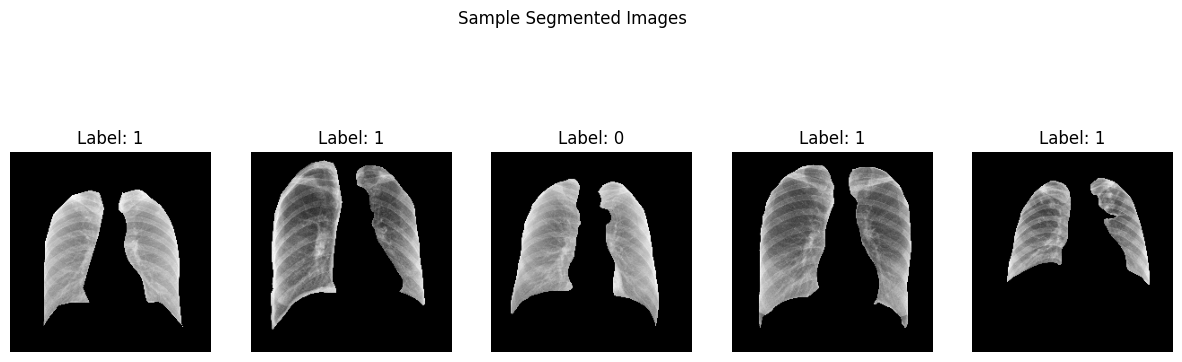

In [5]:
# Load and preprocess data
segmented_images, labels = preprocess_images_and_masks(images_path, masks_path)

# Visualize segmented images
def visualize_images(images, labels, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle("Sample Segmented Images")
    plt.show()

visualize_images(segmented_images, labels)


In [6]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(segmented_images, labels, test_size=0.2, random_state=42)

# Add channel dimension for grayscale
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


In [7]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

unet model

In [8]:
# Define U-Net Model
def build_unet(input_shape):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    # Decoder
    u5 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = Model(inputs, outputs)
    return model

input_shape = X_train.shape[1:]
model = build_unet(input_shape)

compile model

In [9]:
# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


training the model

In [11]:
import tensorflow as tf
# Train Model
history = model.fit(datagen.flow(X_train, y_train, batch_size=16),
                    validation_data=(X_test, y_test),
                    epochs=50,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

# Evaluate Model
y_pred = model.predict(X_test).ravel()
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)
print(classification_report(y_test, y_pred > 0.5))

Epoch 1/50


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 224, 224, 1)